# Converting data files to numpy arrays to facilitate further processing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import decimate, convolve
import math
from scipy.interpolate import griddata

ADC2_GPIO = [7, 8,9,10,11,23,24,25]t
ADC2len = len( ADC2_GPIO)

def GetSeries(Volts):
    
    Map = np.zeros((len(Volts)-1,34), dtype=np.int)#why 34 here?
    for i in range(len(Volts)-1):
        val = Volts[i]
        for k in range(34):
            Map[i][k] = (val & 2**k)/2**k
        if not (i%10000):
            print i
    return Map

def GetV(Volts):
    Signal = [] 
    for i in range(len(Volts)):
        if not (i%100000):
            print 100.0*i/len(Volts)
        val = Volts[i]
        SignalZero = 0 
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

    return Signal

def GetV2(Volts):
    Signal = []
    Map = np.zeros((len(Volts),ADC2len), dtype=np.int)
    for i in range(len(Volts)):
        if not (i%100000):
            print 100.0*i/len(Volts)
        val = Volts[i]
        SignalZero = 0
        for k in range(ADC2len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

    return Signal,Map

In [28]:
filename = "hannes12.dat"
Bytes = np.fromfile(filename, dtype = '<i4')

In [29]:
M = GetV(Bytes)


0.0
9.99999000001
19.99998
29.99997
39.99996
49.99995
59.9999400001
69.9999300001
79.9999200001
89.9999100001
99.9999000001


In [32]:
#n = len(Bytes)
n = len(Bytes)-1#did you mean this?
print n
#Map = GetSeries(Bytes)
Duration = Bytes[-1]
print Duration
#Map = GetSeries(Bytes)#did you mean this?
Fech = n*1.0/(Duration*1e-9)/1e6 # 1e-9 because Duration is in ns, 1e6 because Fech in Msps
print Fech

1000000
1205242116
0.829708808483


go


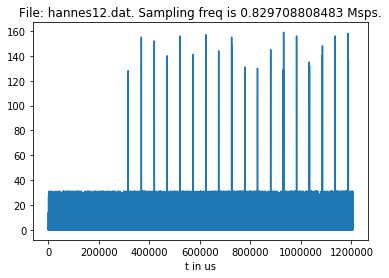

In [33]:
t = range(n)
for k in range(n):
    t[k] = 1.0*t[k]/Fech
#M = GetV2(Bytes)[0]
print "go"
#M = GetV2(Bytes[:-1])[0]#did you mean this?

plt.plot(t,M[0:n])
plt.xlabel('t in us')
plt.title("File: "+filename+". Sampling freq is "+str(Fech)+" Msps.")
plt.savefig(filename.split(".")[0]+'-all.png')  
plt.show()

In [34]:
np.savez_compressed(filename.split(".")[0]+'.npz', M=M, t=t)

In [35]:
loaded = np.load(filename.split(".")[0]+'.npz')

In [36]:
loaded.keys()

['M', 't']

# OK, played enough.
Let's process data and make graphs and npz (numpy archives).

In [1]:
from DAT2NPZ import *
import glob, os

In [48]:
os.chdir("./")
for file in glob.glob("*.dat"):
    CreateNPZ(file)

0.0
99.99900001
100000
9023924
11.0816536132
go
0.0
99.99900001
100000
9023914
11.0816658935
go
0.0
10000
851992
11.7371994103
go
0.0
9.99999000001
19.99998
29.99997


KeyboardInterrupt: 

In [2]:
loaded = np.load('hannes01.npz')
t = loaded["t"]
M = loaded["M"]

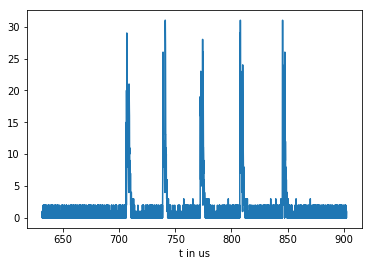

In [4]:
d0 = 7000
dplus = 3000
plt.plot(t[d0:d0+dplus],M[d0:d0+dplus])
plt.xlabel('t in us')
plt.show()

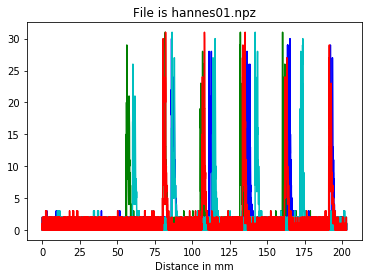

In [14]:
# Let's map this signal in distance
# 2000 pts correspond to ~900-725 = 175us
# a peak at 1m corresponds to 2m in distance. The speed is 1450m/s. So a distance of 1m corresponds to 2/1450 s.
d = []
for k in range(dplus):
    d.append(0.75*t[k] ) ## 1us for 750m/s is 0.75mm
plt.plot(d,M[d0:d0+dplus],"g")
plt.plot(d,M[d0+10000:d0+dplus+10000],"b")
plt.plot(d,M[d0+20000:d0+dplus+20000],"c")
plt.plot(d,M[d0+30000:d0+dplus+30000],"r")
plt.title('File is hannes01.npz')
plt.xlabel('Distance in mm') # us in 1e6
plt.savefig(filename.split(".")[0]+'-detail.png') 
plt.show()